In [11]:
from proxy.base import prepare_train_and_test_sets, get_proxy_v1, get_proxy_v2
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize' : (20,10)}, style='whitegrid')

y, y_pred1,y_pred2=[], [], []

train_df, test_set=prepare_train_and_test_sets('files/smspecs_yearly.xlsx')
base_df=train_df.loc[train_df.type==0]

test_set_keys=[k for k in test_set if k[3:]!='-xxxx'*3]
y_base=base_df.loc[base_df.type==0].yearly.to_numpy()

for i, key in enumerate(test_set_keys):
    if len(test_set[key])>0:
        params=key.replace('xxxx', '0').split('-')
        vars = {'status': [int(x) for x in params[0]], 'year': [int(x) for x in params[1:]]}
        proxy1=get_proxy_v1(vars, train_df)
        proxy2=get_proxy_v2(vars, train_df, test_set)
        if len(proxy1)==len(test_set[key]):
            y=y+test_set[key].yearly.to_list()
            y_pred1=y_pred1+proxy1.y.to_list()
            y_pred2=y_pred2+proxy2.y.to_list()

print(f'proxy_v1 {mean_absolute_percentage_error(y, y_pred1)}')
print(f'proxy_v2 {mean_absolute_percentage_error(y, y_pred2)}')

proxy_v1 0.019085380418114892
proxy_v2 0.020050403711914015


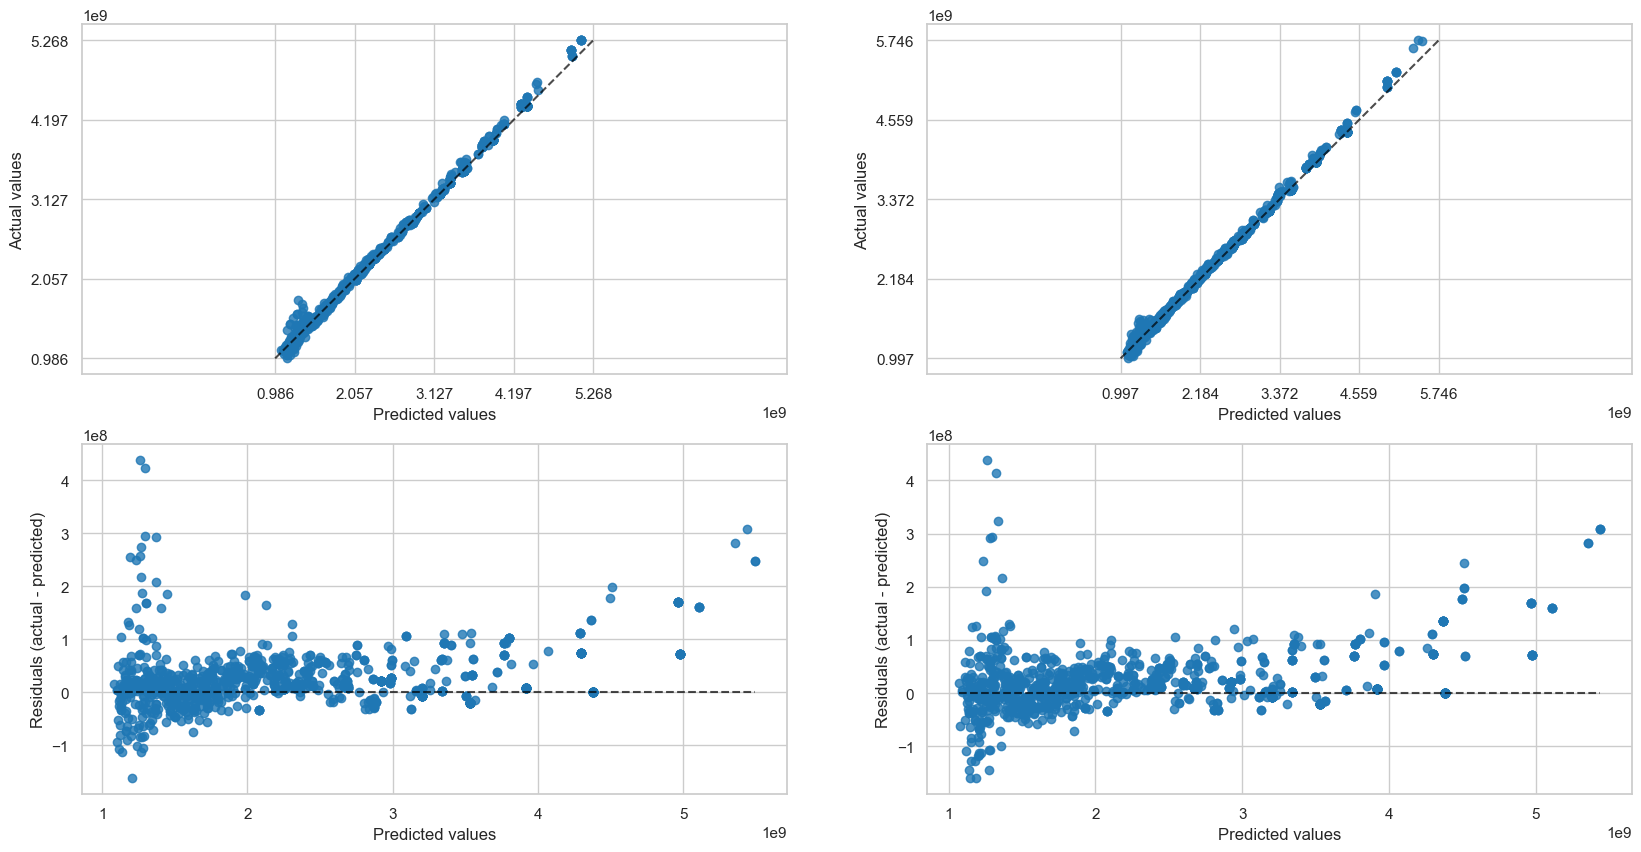

In [21]:
import numpy as np
from sklearn.metrics import PredictionErrorDisplay

y=np.array(y) # значения из ГДМ модели
y_pred1=np.array(y_pred1) #proxy-модель 1
y_pred2=np.array(y_pred1) #proxy-модель 2

fig, axs = plt.subplots(ncols=2, nrows=2)
PredictionErrorDisplay.from_predictions(y, y_pred1, kind="actual_vs_predicted", ax=axs[0][0])
PredictionErrorDisplay.from_predictions(y, y_pred1, kind="residual_vs_predicted", ax=axs[1][0])
PredictionErrorDisplay.from_predictions(y, y_pred2, kind="actual_vs_predicted", ax=axs[0][1])
PredictionErrorDisplay.from_predictions(y, y_pred2, kind="residual_vs_predicted", ax=axs[1][1])

plt.show()


,0
count,5.940000e+03
mean,2.360635e+07
std,5.564648e+07
min,-1.673904e+08
25%,-6.862653e+06
50%,1.235792e+07
75%,4.290279e+07
max,4.808347e+08


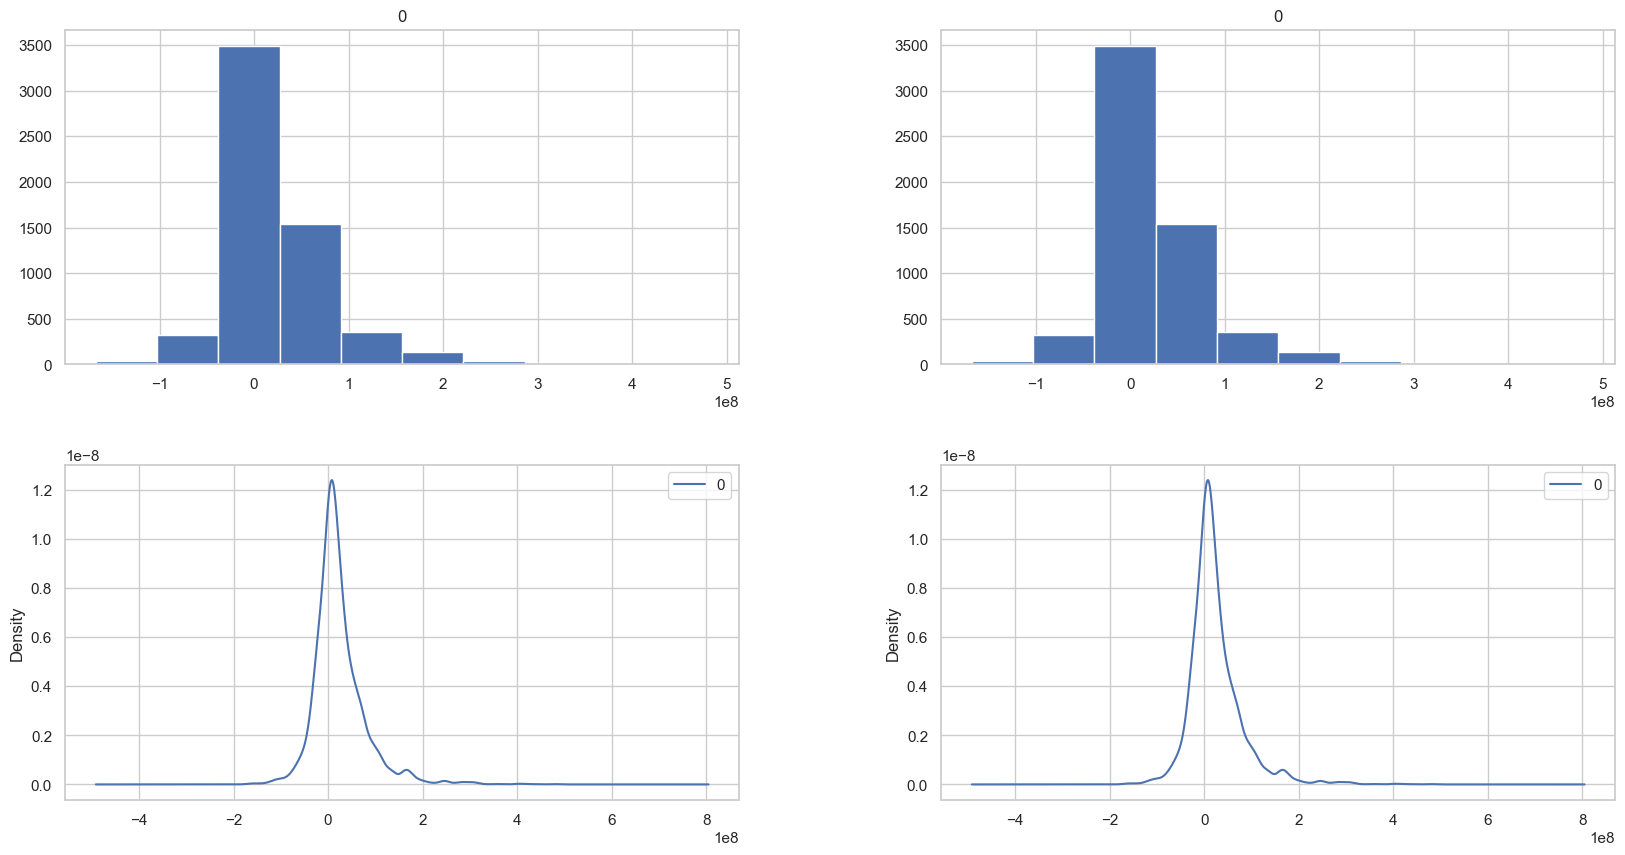

In [17]:
import pandas as pd
residuals1 = pd.DataFrame(y-y_pred1)
residuals2 = pd.DataFrame(y-y_pred2)
fig, axs = plt.subplots(ncols=2, nrows=2)
residuals1.hist(ax=axs[0][0])
residuals1.plot(kind='kde', ax=axs[1][0])

residuals2.hist(ax=axs[0][1])
residuals2.plot(kind='kde', ax=axs[1][1])

residuals2.describe()